# Notebook 9
En aquesta pràctica, farem una cerca aproximada per resoldre un problema de graficar el màxim d'una funció multimodal i un algorisme genètic per tal de resoldre el TSP (Travelling-Salesman Problem).

# Gràfic d'una funció multimodal
En aquest primer exercici de cerca ens concentrarem en el problema de cercar el màxim d’una funció en un determinat interval. Per exemple, considereu la funció  $y=x sin(10πx)+1.0$  a l’interval $[-1.0, 2.0]$:
    

In [ ]:
%matplotlib inline
from pylab import *

x = arange(-1.0, 2.0, 0.01)
y = x * sin(10*pi*x) + 1.0
plot(x,y)

xlabel('x')
ylabel('y')
grid(True)
show()

El problema que ens plantegem és trobar què val el màxim d’aquesta funció dins d’aquest interval i per quin valor de x el pren.
La primera aproximació que prendrem és la cerca per força bruta: generar tots els valors i determinar quin és el màxim. De totes maneres, per fer això podem usar certes funcionalitats de Python que ens faran el programa més elegant.
Una d’aquestes funcionalitats és la comanda yield. Aquesta comanda permet convertir una funció en un iterador. Per entendre el seu funcionament, executeu aquest programa i observeu el seu comportament quan hi entreu un string qualsevol. Com genera les permutacions?

In [ ]:
def all_perms(str):
    if len(str) <=1:
        yield str
    else:
        for perm in all_perms(str[1:]):
            for i in range(len(perm)+1):
                yield perm[:i] + str[0:1] + perm[i:]
                
for i in all_perms("abcd"): print i

Aquesta comanda (que està en lloc del que podrien ser els return de la funció) ens ha creat un iterador, que genera elements només quan els necessitem.
Un altre exemple:

In [ ]:
def contador(max):
    n=0
    while n < max:
       yield n
       n +=1

gen=contador(3)

In [ ]:
gen.next()

In [ ]:
gen.next()

In [ ]:
gen.next()

## Exercici 1

Per desenvolupar el programa aneu seguint els següents passos:

+	Feu una funció ``func1d`` que prengui el valor de $x$ com a paràmetre i retorni el valor de la funció.
+	Feu una funció ``frange1d(start, end, inc)`` que implementi la mateixa funcionalitat que té la instrucció ``range`` pels enters però pels reals.  Feu que aquesta funció torni els valors amb un ``yield`` enlloc de retornar una llista.
+	Feu una funció ``search1d`` que retorni amb un print les informacions següents (en el mateix ordre): 
    +	Quin és el valor màxim de la funció a l’interval [-1,2] quan mostregem els valors de $x$ cada 0.01 unitats (inc=0.01), per quin valor de $x$ es dona, quantes avaluacions de la funció heu fet i quan ha trigat. 
    +	Quin és el valor màxim de la funció a l’interval [-1,2] quan mostregem els valors de $x$ cada 0.0001 unitats (inc=0.0001), per quin valor de $x$ es dona, quantes avaluacions de la funció heu fet i quan ha trigat. 
    +	Quin és el valor màxim de la funció a l’interval [-1,2] quan mostregem els valors de $x$ cada 0.000001 unitats (inc= 0.000001), per quin valor de $x$ es dona, quantes avaluacions de la funció heu fet i quan ha trigat. 

Observació: El valor màxim de la funció està al voltant del valor 2,85 i es dóna per una x al voltant del valor 1,85.

In [119]:
from pylab import *

def func1d(x):
    return x * sin(10*pi*x) + 1.0 #Funció del enunciat en f(x)

In [120]:
#tests de les funcions
func1d(5)

1.0000000000000049

In [121]:
def frange1d(start, end, inc):
    
    n = 0
    while(start+n <= end+inc): #Bucle que em permet establir un rang per els reals
        yield (start+n) #Retorno valors amb un yield
        n= n + inc #Em permet saber quan parar
    

In [122]:
gen=frange1d(0.0,3.0,0.25)

In [123]:
gen.next()

0.0

In [124]:
gen.next()

0.25

In [125]:
gen.next()

0.5

In [126]:
import time
def search1d():
    
    #PRIMER CAS
    
    
    
    t1 = time.clock() #Comença a contar el temps
    inc=0.01 #Cada quantes unitats haig de mostrejar
    interval1=-1.0
    interval2=2.0
    z=0 #Variable auxiliar
    for x in frange1d(interval1,interval2,inc): #Agafo tots els valors a mostrejar amb l'ajuda de la funcio frange1d implementada
        
        y=func1d(x) #Funció
        if(z < y): 
            xtemp=x #xtemp em servirá per saber el en quin valor de x es compleix el màxim
            z=y #z serà el màxim si es compleix que es mes petita que y
    
    iteracions = (interval2-interval1)/inc #Iteracions que he hagut de fer per trobar-lo
    
    t2 = time.clock() #Atura el temps
    temps=(t2-t1)*1000 #Defineix el temps (milisegons)
    
    print "PRIMER CAS"
    print "El maxim es =", z, ", en x =", xtemp,
    print "en",iteracions,"iteracions i ", temps, "milisegons"
    
    #CAS DOS
    
    #Mateix procediment pero amb un mostreig de 0.0001:
    z=0
    inc2=0.0001
    for x in frange1d(interval1,interval2,inc2):
        y=func1d(x)
        if(z < y):
            xtemp=x
            z=y
    iteracions2=(interval2-interval1)/inc2
    t2=time.clock()
    temps2=(t2-t1)*1000
    
    print""
    print "SEGON CAS"

    print "El maxim es=", z, ", en x=", xtemp,
    print "en", iteracions2, "iteracions i", temps2,"milisegons"
    
    #CAS TRES
    
    #Mateix procediment pero amb un mostreig de 0.000001:
    z=0
    inc3=0.000001
    for x in frange1d(interval1,interval2,inc3):
        y=func1d(x)
        if(z < y):
            xtemp=x
            z=y
    iteracions3=(interval2-interval1)/inc3
    t2=time.clock()
    temps3=(t2-t1)*1000
    print ""
    print "TERCER CAS"
    print "El maxim es=",z,", en x=", xtemp,
    print "en", iteracions3, "iteracions, i",temps3," milisegons"

In [127]:
search1d()

PRIMER CAS
El maxim es = 2.85 , en x = 1.85 en 300.0 iteracions i  1.28379585805 milisegons

SEGON CAS
El maxim es= 2.85027170841 , en x= 1.8505 en 30000.0 iteracions i 68.1528673956 milisegons

TERCER CAS
El maxim es= 2.85027376657 , en x= 1.85054700004 en 3000000.0 iteracions, i 5391.97550615  milisegons


## Exercici 2

+ Reescriviu les funcions anteriors (i creeu les funcions ``func2d, frange2d, search2d``) per la funció 
$f(x,y)=200-(x^2+y-11)^2-(x+y^2-7)^2$ a l’interval  $-6≤x,y≤+6$.



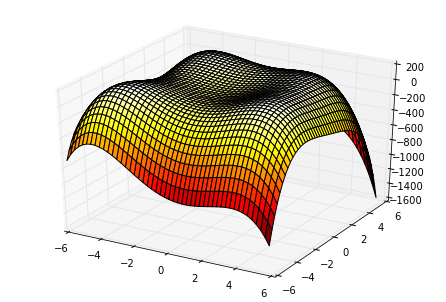

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.arange(-6, 6, 0.25)
Y = np.arange(-6, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 200 - (X**2 + Y -11)**2 - (X+Y**2-7)**2

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot)


show()

In [4]:
%matplotlib inline
def func2d(x, y):
    return (200 - (x**2 + y - 11)**2  - (x+y**2 - 7)**2) #Funció que em demanen en f(x)

In [5]:
#TEST

func2d(5.4,2.3)

-232.22770000000017

In [6]:
def frange2d(start, end, inc): 
    n = 0
    while(start+n <= end+inc):
        yield (start+n)
        n= n + inc

In [7]:
gen2=frange2d(-6.0,6.0,0.1)

In [8]:
gen2.next()

-6.0

In [9]:
gen2.next()

-5.9

In [10]:
gen2.next()

-5.8

In [11]:

def frange2d(start, end, inc):
    
    #AL tenir dos dimensions necesitaré dos variables x i y, dos comensaments:
    comensament = start
    comensament2 = start
    while start <= end:
        comensament = comensament2
        while comensament <= end:
            
            yield(start, comensament)
            
            comensament += inc
        start += inc

In [12]:
def iteracions1(start, end, inc):
    llista = []
    x = frange2d(start, end, inc)
    seguent = start
    while ( seguent < end):
        seguent = x.next()
        llista.append(seguent)
    return llista

In [13]:
#SEARCH 2 D

import time

#BUSCAR MAXIMS

def search2d():
    
    
    inc = 0.01
    
    t1=time.clock()
    ztemp= 0
    
    for x in frange2d(-6.0,6.0, inc):
        
        for y in iteracions1(-6.0, 6.0, inc):
            
            z=func2d(x, y)
            if(ztemp <= z):
                ztemp=z
                xtemp = x
                ytemp = y
    t2=time.clock()
    temps = (t2-t1)*1000
    
    print ""
    print "-PRIMER CAS-"
    
    
    print "El valor máxim és ", ztemp," en l'interval","(", xtemp, ytemp, ")",
    
    print "en", len(iteracions(-6.0, 6.0, inc)) * len(iteracions(-6.0, 6.0, inc)), "iteracions"
    print "en ", temps, "ms"
    
    #Segon Cas
    inc1 = 0.0001
    t1=time.clock()
    ztemp = 0
    for x in frange2d(xtemp-inc, xtemp+inc, inc1):
        for y in iteracions1(ytemp-inc, ytemp+inc, inc1):
                z = func2d(x, y)
                if( ztemp < z):
                    x2temp = x
                    y2temp = y
                    ztemp = z
    t2= time.clock()
    temps2=(t2-t1)*1000
    
    print ""
    print "----------"
    print ""
    print "-SEGON CAS-"
    print "El valor màxim és:", ztemp, " en l'interval(", x2temp, ",", y2temp,")", 
    print "en", len(iteracions2(-6.0, 6.0, inc))* len(iteracions2(-6.0, 6.0, inc)) + len(iteracions1(xtemp-inc, xtemp+inc, inc1))* len(iteracions1(ytemp-inc, ytemp+inc, inc1)), "iteracions"

    print "en ", temps2, "ms"
    
    #Tercer cas
    
    inc2 = 0.000001
    t1=time.clock()
    ztemp = 0
    for x in frange2d(x2temp-inc1, x2temp+inc1, inc2):
        for y in iteracions1(y2temp-inc1, y2temp+inc1, inc2):
                z = func2d(x, y)
                if( ztemp < z):
                        ztemp = z
                        x3temp = x
                        y3temp = y
    t2= time.clock()
    temps3 = (t2-t1)*1000
    
    print ""
    print "----------"
    print ""
    print "-TERCER CAS-"
    print "El valor màxim és:", ztemp, " en l'interval(", x3temp , y3temp,")",
    print "en", len(iteracions1(-6.0, 6.00000, inc))* len(iteracions1(-6.00000, 6.00000, inc)) + len(iteracions1(xtemp-inc, xtemp+inc, inc1))* len(iteracions1(ytemp-inc, ytemp+inc, inc1)) + len(iteracions1(x2temp-inc1, x2temp+inc1, inc2))*len(iteracions1(y2temp-inc1, y2temp+inc1, inc2)) , "iteracions"
    
    print "en ", temps3, "ms"

    
search2d()
    
    
    

TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

Observacions:

+ Si mostregeu $(x,y)$ amb passos molt petits això pot arribar a trigar molt. Comproveu fins on podeu mostrejar 
per poder donar un resultat en menys de 10 segons.

+ Aquesta funció té quatre màxims amb el mateix valor al voltant dels punts (3.58, -1.86), (3.0, 2.0), (-2.815, 3.125) i (-3.78, -3.28).

# Travelling Salesman Problem

En aquesta pràctica, aplicaràs un algorisme genètic per tal de resoldre el TSP (Travelling-Salesman Problem).

El TSP consisteix en trobar el camí mínim que passa per tots els nodes sense repetir-ne cap (això s'anomena camí hamiltonià en teoria de grafs). Amb aquest camí el viatjant de comerç podrà recórrer totes les ciutats d'un territori sense repetir-ne cap i farà el recorregut de menor distància.

<img src="http://imgs.xkcd.com/comics/travelling_salesman_problem.png">

<a href="http://www.math.uwaterloo.ca/tsp/history/pictorial/dfj.html"><img src="http://www.math.uwaterloo.ca/tsp/history/img/dantzig.gif"></a>
<br>


### Vocabulari

Primer de tot, ens hem d'assegurar de conéixer bé el vocabulari per tal de entendre el que hem de fer:

- **Ciutat**: Per a aquest exercici, l'única cosa que coneixem de la ciutat és el nom i la distància a la resta de ciutats.
- **Ciutats**: per tal de representar el conjunt de ciutats, farem servir un conjunt **set**, de Python.
- **Distància**: Com hem dit abans, hem de coneixer la distància entre ciutats. Per a fer-ho, teniu implemenada la funció `distancia(A, B)` que ens dóna la distància com a nombre real, **float** a Python.
- **Recorregut**: Un recorregut és una llista ordenada de ciutats; farem servir una **llista** de Python. En el nostre problema els recorreguts seran els "individus" de la nostra població.
- **Distància total**: La distància total d'un recorregut és la suma de les distàncies entre cada parell de ciutats que apareixen seguides en el recorregut. La calcularem amb la funció `distancia_total(recorregut)`. La solució serà aquell recorregut que suposarà una distància total mínima.
- **Generació / Població**: Conjunt de recorreguts que formen una generació de solucions. Segons la lògica dels algorismes genètics a cada generació ens anirem acostant més a la solució òptima. Farem servir una **llista** de Python. La generació actual és la nostra població.

### Força bruta

La forma més directa de trobar la solució aproximada, és fer una cerca exhaustiva. En aquest problema, haurem de generar totes les possibles solucions i avaluar-les.

La solució per cerca ehaustiva amb 10 ciutats, triga entre 2 i 3 segons. En general, aquesta aproximació al `TSP` ha d'explorar (*n*-1)! recorreguts amb *n* ciutats. Cada recorregut té $n$ ciutats, així que, per a un problema amb $n$ ciutats, el cost computacional serà **O(n!)**

Això vol dir, que només per a 24 ciutats, trigariem més que l'edat de l'univers en arribar a la millor solució:

<table>
<tr><th>n ciutats<th>temps
<tr><td>10<td>3 s
<tr><td>12<td>3 s &times; 12 &times; 11 = 6.6 m
<tr><td>14<td>6.6 m &times; 13 &times; 14 = 20 h
<tr><td>24<td>3 s &times; 24! / 10! ≈ 16,000,000,000 anys
</table>

*(informació extreta de http://norvig.com/ipython/TSP.ipynb)*

### Algorisme genètic
Recordem els passos d'un algorisme genètic

0. hem de tenir una funció avaluació de l'adaptació de cada individu
1. hem de seleccionar els individus que passaran a la següent generació
2. hem de seleccionar els individus que seran els pares  de la següent generació
3. hem crear la següent generació per creuament i mutació

En el nostre cas, un individu és *un recorregut*, és a dir un ordenament determinat del conjunt de ciutats.

Abans però de començar i donades les característiques de les dades i la solució en el nostre problema haurem de **llegir les dades de les ciutats** i haurem de poder **graficar la solució**. Aquesta part del problema us la donem resolta.

## Lectura de les dades

Com a dades us donem una primera solució al problema, un recorregut determinat. Aquestes dades us les donem en un fitxer de text de valors separats per comes (CSV) (en aquest cas el separador són espais) en el que anem detallant les dades d'una ciutat. Per a cada ciutat us donem una abreviatura, la latitud, la longitud, el nom complet i l'estat(són ciutats americanes)
L'ordre d'aparició de les ciutats determina l'ordre del recorregut. Per exemple en el nostre fitxer el recorregut anirà de Tuscaloosa a Flagstaff, després a Phoenix...


    [TCL]  33.23   87.62  Tuscaloosa,AL


### Representació de la posició d'una ciutat
El què volem serà representar cada ciutat com un punt en un graf per poder dibuixar el recorregut. Així que a cada ciutat li assignarem una coordenada x i una coordenada y. Si treballessim directament amb latituds i longituds ens seria molt costós calcular la distància i graficar els punts,  per això fem el truc d'usar els nombres complexos, que per definició tenen dos components, el real i l'imaginari, que assignarem respectivament a la coordenada x i a la coordenada y escalades segons correspon.

In [1]:
Punt = complex
Ciutat  = Punt

def X(punt): 
    "La coordenada X d'un punt"
    return punt.real

def Y(punt): 
    "La coordenada Y d'un punt"
    return punt.imag

def Crear_ciutat(lat,long):
    return Ciutat(-48 * float(long),69 * float(lat))

In [2]:
#test de la funció
a=Crear_ciutat(33.23,87.62)
print a
print X(a)
print Y(a)
b=Crear_ciutat(35.13,111.67)
print b
print X(b)
print Y(b)

(-4205.76+2292.87j)
-4205.76
2292.87
(-5360.16+2423.97j)
-5360.16
2423.97


In [3]:
def distancia(a, b): 
    return abs(a - b)

In [4]:
#test de la funció
a=Crear_ciutat(33.23,87.62)
b=Crear_ciutat(35.13,111.67)
c=Crear_ciutat(33.43,112.02)
print distancia(a,b)
print distancia(a,c)


1161.82036908
1171.28129841


### Processat del fitxer CSV
Per processar el fitxr csv farem us de la funció reader de la llibreria csv. Aquesta funció ens permet llegir línia a línia el fitxer i separar els diferents camps segons el delimitador donat:

In [5]:
import csv
def lectura0():
    with open('ciutats_USA.csv', 'rb') as fp:
        text=fp.read()
    text2=text.strip().splitlines()
    csvreader=csv.reader(text2,delimiter=' ',skipinitialspace=True)
    for row in csvreader:
        print ', '.join(row)

In [6]:
#test de la funció
lectura0()

TCL, 33.23, 87.62, Tuscaloosa,AL
FLG, 35.13, 111.67, Flagstaff,AZ
PHX, 33.43, 112.02, Phoenix,AZ
PGA, 36.93, 111.45, Page,AZ
TUS, 32.12, 110.93, Tucson,AZ
LIT, 35.22, 92.38, Little, Rock,AR
SFO, 37.62, 122.38, San, Francisco,CA
LAX, 33.93, 118.40, Los, Angeles,CA
SAC, 38.52, 121.50, Sacramento,CA
SAN, 32.73, 117.17, San, Diego,CA
SBP, 35.23, 120.65, San, Luis, Obi,CA
EKA, 41.33, 124.28, Eureka,CA
DEN, 39.75, 104.87, Denver,CO
DCA, 38.85, 77.04, Washington/Natl,DC
MIA, 25.82, 80.28, Miami, Intl,FL
TPA, 27.97, 82.53, Tampa, Intl,FL
JAX, 30.50, 81.70, Jacksonville,FL
TLH, 30.38, 84.37, Tallahassee,FL
ATL, 33.65, 84.42, Atlanta,GA
BOI, 43.57, 116.22, Boise,ID
CHI, 41.90, 87.65, Chicago,IL
IND, 39.73, 86.27, Indianapolis,IN
DSM, 41.53, 93.65, Des, Moines,IA
SUX, 42.40, 96.38, Sioux, City,IA
ICT, 37.65, 97.43, Wichita,KS
LEX, 38.05, 85.00, Lexington,KY
NEW, 30.03, 90.03, New, Orleans,LA
BOS, 42.37, 71.03, Boston,MA
PWM, 43.65, 70.32, Portland,ME
BGR, 44.80, 68.82, Bangor,ME
CAR, 46.87, 68.02

Aprofitarem aquesta funció per processar les dades llegides i convertir cada fila en un format de diccionari, en el que:
- L'abreviatura de la ciutat serà la clau
- La posició la representarem amb un número complex com hem explicat abans

In [7]:
import csv
def lectura():
    diccionari={}
    with open('ciutats_USA.csv', 'rb') as fp:
        text=fp.read()
    text2=text.strip().splitlines()
    csvreader=csv.reader(text2,delimiter=' ',skipinitialspace=True)
    for row in csvreader:
        diccionari[row[0]]=Crear_ciutat(row[1],row[2])
    return diccionari

In [8]:
#test de la funció
diccionari = lectura()   #diccionari serà una variable global que usarem després
ciutats=set()
for clau,valor in diccionari.items():
    print clau, valor
    ciutats.add(clau)
print ciutats            #ciutats també serà una variable global

LGU (-5368.8+2882.82j)
CRP (-4680+1916.13j)
FSD (-4643.04+3007.02j)
SLC (-5374.56+2813.82j)
MFR (-5897.76+2923.53j)
MIA (-3853.44+1781.58j)
CAR (-3264.96+3234.03j)
ATL (-4052.16+2321.85j)
BOS (-3409.44+2923.53j)
DET (-3984.96+2926.98j)
MEM (-4320+2418.45j)
EKA (-5965.44+2851.77j)
SAF (-5091.84+2457.78j)
LIT (-4434.24+2430.18j)
BOI (-5578.56+3006.33j)
BGR (-3303.36+3091.2j)
AGC (-3836.64+2784.15j)
DEN (-5033.76+2742.75j)
NYC (-3551.04+2813.13j)
NEW (-4321.44+2072.07j)
FLG (-5360.16+2423.97j)
SUX (-4626.24+2925.6j)
CVG (-4064.16+2694.45j)
BIL (-5209.44+3160.2j)
SAN (-5624.16+2258.37j)
PGA (-5349.6+2548.17j)
SAC (-5832+2657.88j)
PDX (-5884.8+3146.4j)
SGU (-5452.8+2558.52j)
BTM (-5400+3170.55j)
MKE (-4219.2+2963.55j)
DCA (-3697.92+2680.65j)
TCL (-4205.76+2292.87j)
SEA (-5870.4+3274.05j)
PVD (-3428.64+2879.37j)
RAP (-4947.36+3039.45j)
AWH (-5580+2851.77j)
TYS (-4031.04+2471.58j)
BUF (-3779.04+2962.17j)
BIS (-4836+3227.13j)
SAT (-4726.56+2037.57j)
RDU (-3781.44+2475.03j)
CYS (-5031.36+2839.3

## Graficar la solució
Per graficar la solució treballarem amb la llibreria matplotlib, que ens permet dibuixar punts i línies.

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_diccionari(diccionari, style='bo-'):
    '''
    Prenem com entrada un diccionari amb clau el nom de la ciutat i valor les seves coordenades,
    per a graficar, ens calen només les coordenades (els valors del diccionari)
    '''
    plt.plot(map(X, diccionari.values()), map(Y, diccionari.values()), style)
    plt.axis('scaled'); plt.axis('off') #fa que l'àrea de representació sigui proporcional 
                                        #i que no dibuixi els eixos
def plot_linies_ciutats(ciutats, style='bo-'):
    '''
    Prenem com entrada el nom de les ciutats,
    per a graficar, ens calen les coordenades que trobem als valors del diccionari (ciutat:coordenades),
    accedim mitjançant el nom de la ciutat
    '''
    punts = [diccionari[c] for c in ciutats]
    plt.plot(map(X, punts), map(Y, punts), style)
    plt.axis('scaled'); plt.axis('off') #fa que l'àrea de representació sigui proporcional 
                                        #i que no dibuixi els eixos
def plot_recorregut(recorregut): 
    '''
    Mostrem un recorregut com un cicle. 
    Per a fer-ho, afegim al tour la primera ciutat al final, 
    de forma que sempre tornem al principi del recorregut.
    '''
    recorregut.append(recorregut[0])
    plot_linies_ciutats(recorregut)

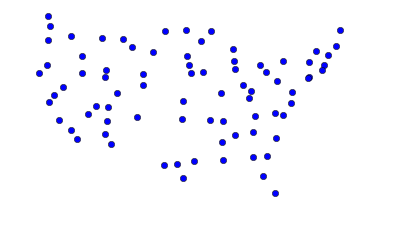

In [10]:
diccionari=lectura()
plot_diccionari(diccionari, 'bo')

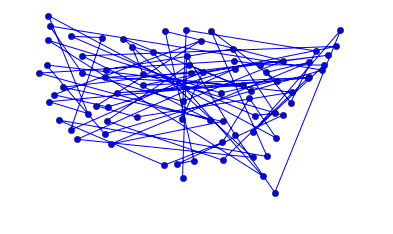

In [11]:
plot_linies_ciutats(ciutats)

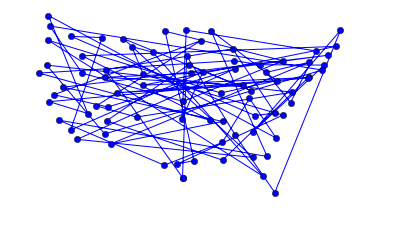

In [12]:
recorregut=list(ciutats)
plot_recorregut(recorregut)

## Algorisme genètic. Pas -1. Generació de solucions
En el nostre cas no disposem d'un conjunt d'individus d'entre els quals triar les solucions òptimes pel problema, i per tant l'haurem de generar.
En aquesta cel·la has de definir la funció `generar_poblacio(n, ciutats)`, que generi n gens a partir de les ciutats definides en el fitxer donat.
La funció retornarà la població, és a dir una llista amb n recorreguts.

In [13]:
import random
def generar_poblacio(n, ciutats, rnd_seed=42):
    
    poblacio=[]
    random.seed(rnd_seed) #fixem la llavor
    
    for i in range(n):
        recorregut = random.sample(ciutats, len(ciutats)) #Sample retorna una llista de certa longitud d'elements 
        #triats de la poblacio de la sequencia.
        poblacio.append(recorregut)
        
    return poblacio

In [14]:
#test de la funció
print generar_poblacio(1500,ciutats,42)

[['JAN', 'FSD', 'SAN', 'SUX', 'LAS', 'DRT', 'ALB', 'BOS', 'PHX', 'TCL', 'NEW', 'ICT', 'GRB', 'DEN', 'RAP', 'BUF', 'NYC', 'IAH', 'BTM', 'CRP', 'JAX', 'SHR', 'BIL', 'MKE', 'CHS', 'CVG', 'ATL', 'ALW', 'PDX', 'OKC', 'CYS', 'MEM', 'STC', 'STL', 'TYS', 'SAC', 'BIS', 'SGU', 'TPA', 'PGA', 'DCA', 'CLE', 'SFO', 'LIT', 'FAR', 'PWM', 'MIA', 'EKA', 'TLH', 'BOI', 'OMA', 'DSM', 'DET', 'DLH', 'FLG', 'MPV', 'CAR', 'TUS', 'AWH', 'SAF', 'EWR', 'BGR', 'CNY', 'MFR', 'LAX', 'CHI', 'INT', 'SLC', 'LGU', 'IND', 'AGC', 'RIC', 'PVD', 'SEA', 'RNO', 'SAT', 'LEX', 'SBP', 'BLI', 'RDU'], ['PDX', 'TLH', 'STL', 'MPV', 'PHX', 'FLG', 'LAX', 'IAH', 'BOS', 'MIA', 'DET', 'TPA', 'CHS', 'DCA', 'CAR', 'SAC', 'RNO', 'AWH', 'SLC', 'LEX', 'CRP', 'RAP', 'RDU', 'ALW', 'NYC', 'BUF', 'OKC', 'PGA', 'OMA', 'JAX', 'RIC', 'BGR', 'MEM', 'MKE', 'SHR', 'EWR', 'DEN', 'SAF', 'STC', 'CLE', 'SFO', 'SAN', 'MFR', 'BIL', 'IND', 'BOI', 'BLI', 'LGU', 'ALB', 'INT', 'EKA', 'FSD', 'DLH', 'SEA', 'TCL', 'DRT', 'PVD', 'SUX', 'BTM', 'SGU', 'DSM', 'LIT', 'T

## Algorisme genètic. Pas 0 funció d'avaluació
Aquesta funció us la donem feta. Donat un conjunt de ciutats ordenades segons el recorregut a seguir i la seva posició en el format de diccionari anterior ens retorna el cost del recorregut.

In [15]:
def distancia_total(o_gene):
    '''
    Aquesta funció retorna el cost d'un gen (un recorregut)
    '''
    visitades = []
    cost = 0
    gene = o_gene[:]
    gene.append(gene[0]) # tanquem el cicle
    for i in range(len(gene)-1):
        if gene[i] in visitades:
            cost += 10000
        else:
            if gene[i] != gene[i+1]: # verifiquem si la darrera ciutat es repeteix
                cost += distancia(diccionari[gene[i]], diccionari[gene[i+1]])
            visitades.append(gene[i])
    if gene[-2] != gene[-1]: # verifiquem si la darrera ciutat es repeteix
        cost += distancia(diccionari[gene[-2]], diccionari[gene[-1]])
    return cost

In [16]:
# #test de la funció. Per provar-ho farem el recorregut de les ciutats inicials
recorregut=list(ciutats)
print distancia_total(recorregut)

91356.3882089


## Algorisme genètic. Pas 1 probabilitat de selecció
En aquesta cel.la has de definir una funció, `probabilitat_seleccio(poblacio,p)`, que calcularà la probabilitat de selecció de cadascun dels gens seguint el **mètode d'ordenació** explicat a la teoria de l'assignatura, en el que p és la probabilitat inicial.
La funció retornarà la probabilitat, en forma de diccionari on la clau és l'índex del recorregut a la població, i el valor, la probabilitat associada.

In [17]:
def probabilitat_seleccio(poblacio,p):
    
    #Ordeno
    distancies = [[index, 1/distancia_total(value)] for (index, value) in enumerate(poblacio)]
    # qi, i
    sorted(distancies, key=lambda distancia: distancia[1])   # sort by qi
   
   
    probabilitatEntrada = p #Anomeno prob d'entrada a p
    segonaProbabilitat = p #i tambe la segona posible probabilitat a p
    
    for index in range(len(distancies)): 
        distancies[index][1] = p #Agafa la distancia i asignali la probabilitat corresponent de l'index
        
        p = (1-segonaProbabilitat)* probabilitatEntrada #Amb la multiplicacio aconsegueixo que la probabilitat s'asigni en
        #la posició corresponent i no una aleatoria
        
        segonaProbabilitat += p #Incrementa la probabilitat
   
    return dict(distancies)

In [18]:
#test de la funció
poblacio=generar_poblacio(1500,ciutats,42)
probabilitat=probabilitat_seleccio(poblacio,0.001)
print probabilitat

{0: 0.001, 1: 0.000999, 2: 0.000998001, 3: 0.000997002999, 4: 0.000996005996001, 5: 0.000995009990004999, 6: 0.000994014980014994, 7: 0.000993020965034979, 8: 0.000992027944069944, 9: 0.000991035916125874, 10: 0.0009900448802097482, 11: 0.0009890548353295385, 12: 0.000988065780494209, 13: 0.0009870777147137147, 14: 0.000986090636999001, 15: 0.000985104546362002, 16: 0.0009841194418156402, 17: 0.0009831353223738245, 18: 0.0009821521870514505, 19: 0.000981170034864399, 20: 0.0009801888648295347, 21: 0.0009792086759647053, 22: 0.0009782294672887404, 23: 0.0009772512378214517, 24: 0.0009762739865836303, 25: 0.0009752977125970466, 26: 0.0009743224148844496, 27: 0.0009733480924695652, 28: 0.0009723747443770956, 29: 0.0009714023696327184, 30: 0.0009704309672630858, 31: 0.0009694605362958226, 32: 0.0009684910757595268, 33: 0.0009675225846837673, 34: 0.0009665550620990835, 35: 0.0009655885070369845, 36: 0.0009646229185299476, 37: 0.0009636582956114174, 38: 0.0009626946373158061, 39: 0.000961731

## Algorisme genètic. Pas 2 selecció pares

En aquesta cel.la es defineix la funció auxiliar `ordenar_probabilitat(probabilitat)` que retornarà una nova llista amb les probabilitats ordenades segons el seu valor, i la funció `seleccionar_pare(probs, poblacio)`, que seleccionarà un pare per a la segona generació seguint les probabilitats calculades anteriorment (mètode ruleta).

In [19]:
def ordenar_probabilitat(probabilitat):
    return sorted(probabilitat.items(),key=lambda x:x[1], reverse=True)
    
def seleccionar_pare(probabilitat_ordenada, poblacio):
    valor_ruleta = random.random() # nombre aleatori
    probabilitat_acumulada = 0
    idx = 0
    # mentres no assolim el valor de la ruleta o sortim de la llista
    while idx < len(probabilitat_ordenada)-1 and probabilitat_acumulada < valor_ruleta: 
        probabilitat_acumulada += probabilitat_ordenada[idx][1] # acumulem la probabilitat
        idx += 1
    #retornem el darrer element (el que correspon amb el nombre aleatori)
    return poblacio[probabilitat_ordenada[idx][0]] 

In [20]:
#test de la funció
probabilitat_ordenada=ordenar_probabilitat(probabilitat)
print seleccionar_pare(probabilitat_ordenada,poblacio)

['SHR', 'TLH', 'NEW', 'PWM', 'INT', 'CVG', 'SEA', 'CAR', 'OKC', 'IAH', 'PVD', 'TPA', 'JAN', 'OMA', 'BTM', 'EKA', 'EWR', 'FLG', 'RIC', 'DCA', 'MKE', 'DLH', 'SLC', 'TYS', 'FSD', 'CHI', 'SGU', 'BOS', 'AWH', 'DET', 'CHS', 'BUF', 'STC', 'LAS', 'CLE', 'RNO', 'CNY', 'NYC', 'SUX', 'LEX', 'PDX', 'AGC', 'BOI', 'MEM', 'RDU', 'DEN', 'RAP', 'MFR', 'DRT', 'SBP', 'ATL', 'ALW', 'MIA', 'GRB', 'SAN', 'BLI', 'BIS', 'PGA', 'LAX', 'ALB', 'TCL', 'IND', 'JAX', 'DSM', 'STL', 'MPV', 'SFO', 'BIL', 'SAC', 'SAF', 'TUS', 'LIT', 'CYS', 'LGU', 'CRP', 'BGR', 'PHX', 'SAT', 'FAR', 'ICT']


## Algorisme genètic. Pas 3 creuament
En aquesta cel·la es defineix la funció `generar_descendencia(g1, g2)`, que creuarà dos gens seleccionant un pivot. La funció retornarà dos nous gens, producte del creuament.

In [21]:
def generar_descendencia(g1, g2):
    '''
    Aquesta funció creua dos gens g1 i g2 i retorna dos fills
    El creuament es fa dividint cadascuna de les llistes i barrejant-les
    Aquest algorisme pot generar camins no hamiltonians, que seran penalitzats 
    per la funció distancia_total(gene).
    '''
    split = random.randint(0,len(g1)) # seleccionem un pivot aleatori
    fill_1 = g1[:split]+g2[split:] # el primer descendent és la primera combinació
    fill_2 = g2[:split]+g1[split:] # el segon descendent és la segona combinació
    return fill_1, fill_2 # retornem la descendència


In [22]:
g1=['EKA', 'FLG', 'SAN', 'FSD', 'PDX', 'TCL', 'SEA', 'CYS', 'LIT', 'SAC', 'SHR', 'BTM', 'INT', 'ATL', 'NYC', 'CAR', 'SAF', 'CHS', 'TUS', 'CVG', 'IAH', 'MPV', 'RIC', 'IND', 'SBP', 'TPA', 'NEW', 'AGC', 'ALB', 'JAX', 'PWM', 'GRB', 'SLC', 'DEN', 'SFO', 'TYS', 'BUF', 'STC', 'LGU', 'BIL', 'DSM', 'PVD', 'EWR', 'LEX', 'BIS', 'MKE', 'OMA', 'TLH', 'PHX', 'ALW', 'ICT', 'RAP', 'DCA', 'BLI', 'STL', 'LAS', 'PGA', 'MEM', 'MIA', 'SGU', 'DRT', 'MFR', 'BGR', 'BOS', 'CLE', 'RDU', 'FAR', 'DET', 'DLH', 'AWH', 'CRP', 'OKC', 'LAX', 'CHI', 'RNO', 'JAN', 'SUX', 'SAT', 'CNY', 'BOI']
g2=['RDU',  'BLI',  'SBP',  'LEX',  'SAT',  'RNO',  'SEA',  'PVD',  'RIC',  'AGC',  'IND',  'LGU',  'SLC',  'INT',  'CHI',  'LAX',  'MFR',  'CNY',  'BGR',  'EWR',  'SAF',  'AWH',  'TUS',  'CAR',  'MPV',  'FLG',  'DLH',  'DET',  'DSM',  'OMA',  'BOI',  'TLH',  'EKA',  'MIA',  'PWM',  'FAR',  'LIT',  'SFO',  'CLE',  'DCA',  'PGA',  'TPA',  'SGU',  'BIS',  'SAC',  'TYS',  'STL',  'STC',  'MEM',  'CYS',  'OKC',  'PDX',  'ALW',  'ATL',  'CVG',  'CHS',  'MKE',  'BIL',  'SHR',  'JAX',  'CRP',  'BTM',  'IAH',  'NYC',  'BUF',  'RAP',  'DEN',  'GRB',  'ICT',  'NEW',  'TCL',  'PHX',  'BOS',  'ALB',  'DRT',  'LAS',  'SUX',  'SAN',  'FSD',  'JAN']
print generar_descendencia(g1,g2)


(['EKA', 'FLG', 'SAN', 'FSD', 'SAT', 'RNO', 'SEA', 'PVD', 'RIC', 'AGC', 'IND', 'LGU', 'SLC', 'INT', 'CHI', 'LAX', 'MFR', 'CNY', 'BGR', 'EWR', 'SAF', 'AWH', 'TUS', 'CAR', 'MPV', 'FLG', 'DLH', 'DET', 'DSM', 'OMA', 'BOI', 'TLH', 'EKA', 'MIA', 'PWM', 'FAR', 'LIT', 'SFO', 'CLE', 'DCA', 'PGA', 'TPA', 'SGU', 'BIS', 'SAC', 'TYS', 'STL', 'STC', 'MEM', 'CYS', 'OKC', 'PDX', 'ALW', 'ATL', 'CVG', 'CHS', 'MKE', 'BIL', 'SHR', 'JAX', 'CRP', 'BTM', 'IAH', 'NYC', 'BUF', 'RAP', 'DEN', 'GRB', 'ICT', 'NEW', 'TCL', 'PHX', 'BOS', 'ALB', 'DRT', 'LAS', 'SUX', 'SAN', 'FSD', 'JAN'], ['RDU', 'BLI', 'SBP', 'LEX', 'PDX', 'TCL', 'SEA', 'CYS', 'LIT', 'SAC', 'SHR', 'BTM', 'INT', 'ATL', 'NYC', 'CAR', 'SAF', 'CHS', 'TUS', 'CVG', 'IAH', 'MPV', 'RIC', 'IND', 'SBP', 'TPA', 'NEW', 'AGC', 'ALB', 'JAX', 'PWM', 'GRB', 'SLC', 'DEN', 'SFO', 'TYS', 'BUF', 'STC', 'LGU', 'BIL', 'DSM', 'PVD', 'EWR', 'LEX', 'BIS', 'MKE', 'OMA', 'TLH', 'PHX', 'ALW', 'ICT', 'RAP', 'DCA', 'BLI', 'STL', 'LAS', 'PGA', 'MEM', 'MIA', 'SGU', 'DRT', 'MFR', 'B

En aquesta cel.la heu de definir la funció ´generar_fills(poblacio,probabilitat,percent_descendencia)´ que farà les crides necessàries a ordenar_probabilitat, seleccionar_pare i a generar_descendència per crear el percentatge de fills corresponent. La funció retornarà una llista de recorreguts, corresponents als fills generats.

In [23]:

def generar_fills(poblacio,probabilitat,percent_descendencia):
    
    fills = [] # aquesta llista ha de contenir percent_descendencia*len(poblacio) elements
    
    nFills = int(percent_descendencia * len(poblacio))
    

    for i in range(nFills): #Per cada element de la llista haure de fer sort()
        
        papa = seleccionar_pare(probabilitat_ordenada, poblacio) #La variable papa em fará de pare de la seguent generacio
        #L'obtin per la fun seleccionar_pare amb la probabilitat un cop ordenada
        
        papa2 = seleccionar_pare(probabilitat_ordenada, poblacio) #El mateix amb el segon pare
        
        Posible1, Posible2 = generar_descendencia(papa, papa2) #Defineixo els posibles valors de la 
        #següent generació amb la funcio que la genera
        
        fills.append(Posible1) #Ajuntals a la llista
        fills.append(Posible2)
        
        
        
    return fills

In [24]:
#test de la funció
fills=generar_fills(poblacio,probabilitat,0.5)
print fills

NameError: global name 'num_fills' is not defined

En aquesta cel·la heu de definir la funció `regenerar(poblacio,fills,probabilitat_ordenada,percent_elit,percent_descendencia)` que intercanviarà els elements de la població no seleccionats com a poblacio_elit per els fills corresponents. 
La funció retornarà la població amb els nous fills.

In [25]:

def regenerar(poblacio,fills,probabilitat_ordenada,percent_elit,percent_descendencia):
    
    elits = (int(len(poblacio) * percent_elit)) #Retornam la multiplicació entera
    
    prob_elit = probabilitat_ordenada[nombre_elit][1] #La probabilitat de seleccionar aquells que segueixen la estretegia
    #elitista es trobarán el les "primeres posicions" de la llista un cop ordenada
    
    for x in probabilitat_ordenada:
        
        if x[1] < prob_elit:
            
            nocompleixen=x[1]
    
    random.shuffle(nocompleixen) #Aquells que no han sigut seleccionats per l'estrategia elitista tambe tenen una probabilitat
    #Per aixo els barrejo aleatoriament
    
    posiblesNodescendents = int(percent_descendencia * len(poblacio))  #Poden tenir descendencia igual!
    
    noSeguentGen=[y for y in poblacio if y in [x[0] for x in probabilitat_ordenada if x[1] < prob_elit]] #Correspon a:
        
    #Aquells individus que formen part de la poblacio "no-viva", escollits per si son més petits que la probabilitat
    #d'entrar dins de l'estrategia elitista
    
    random.shuffle(noSeguentGen) #Iguals que "nocompleixen" necesiten ser aleatoris
    
    noSeguentGen = noSeguentGen[nocompleixen:]#La generacio que no pasará i la seva descendencia estarán "redere" dels no-compleixen
    
    #Eliminemlos
    for p in poblacio:
        if p not in noSeguentGen:
            poblacio = p
 
    
    poblacio.append(fills)
    
    
    
    return poblacio

In [ ]:
#test de la funció
poblacio=regenerar(poblacio,fills,probabilitat_ordenada,0.1,0.5)
print poblacio

## Algorisme genètic. Pas 4 mutació
En aquesta cel·la es defineix funció `mutar(gene, beta)` que mutarà un recorregut intercanviant la posició de dues ciutats amb probabilitat beta. La funció retornarà el gen(recorregut) mutat.

In [111]:
def mutar(gene, beta):
    '''
    Aquesta funció muta aleatoriament les ciutats d'un tour.
    El que farem per assegurar-nos que els resultats son hamiltonians 
    és intercanviar dues posicions
    '''
    for i in range(len(gene)): # per cada ciutat
        if random.random() <= beta: # amb probabilitat beta
            pos = random.randint(0,len(gene)-1) # seleccionem una segona posició
            gene[i], gene[pos] = gene[pos], gene[i] # les intercanviem
    return gene

In [112]:
#test de la funció
g1=['EKA', 'FLG', 'SAN', 'FSD', 'PDX', 'TCL', 'SEA', 'CYS', 'LIT', 'SAC', 'SHR', 'BTM', 'INT', 'ATL', 'NYC', 'CAR', 'SAF', 'CHS', 'TUS', 'CVG', 'IAH', 'MPV', 'RIC', 'IND', 'SBP', 'TPA', 'NEW', 'AGC', 'ALB', 'JAX', 'PWM', 'GRB', 'SLC', 'DEN', 'SFO', 'TYS', 'BUF', 'STC', 'LGU', 'BIL', 'DSM', 'PVD', 'EWR', 'LEX', 'BIS', 'MKE', 'OMA', 'TLH', 'PHX', 'ALW', 'ICT', 'RAP', 'DCA', 'BLI', 'STL', 'LAS', 'PGA', 'MEM', 'MIA', 'SGU', 'DRT', 'MFR', 'BGR', 'BOS', 'CLE', 'RDU', 'FAR', 'DET', 'DLH', 'AWH', 'CRP', 'OKC', 'LAX', 'CHI', 'RNO', 'JAN', 'SUX', 'SAT', 'CNY', 'BOI']
print mutar(g1,0.01)

['EKA', 'FLG', 'SAN', 'FSD', 'PDX', 'TCL', 'SEA', 'CYS', 'LIT', 'SAC', 'SHR', 'BTM', 'INT', 'ATL', 'NYC', 'CAR', 'SAF', 'CHS', 'TUS', 'CVG', 'IAH', 'MPV', 'RIC', 'IND', 'SBP', 'TPA', 'NEW', 'AGC', 'ALB', 'JAX', 'PWM', 'GRB', 'SLC', 'DEN', 'SFO', 'TYS', 'BUF', 'STC', 'LGU', 'BIL', 'DSM', 'PVD', 'EWR', 'LEX', 'BIS', 'MKE', 'OMA', 'TLH', 'PHX', 'ALW', 'ICT', 'RAP', 'DCA', 'BLI', 'STL', 'LAS', 'PGA', 'MEM', 'MIA', 'SGU', 'DRT', 'MFR', 'BGR', 'BOS', 'CLE', 'RDU', 'FAR', 'DET', 'DLH', 'AWH', 'CRP', 'OKC', 'LAX', 'CHI', 'RNO', 'JAN', 'SUX', 'SAT', 'CNY', 'BOI']


## Algorisme genètic. Tot junt

En aquesta cel·la has de definir l'algorisme principal.
El procediment serà el següent, per a cadascuna de les iteracions:

1) calcular la probabilitat de sel·lecció de cada gen (<i>selection_prob(population, p)</i>)

2) sel·leccionar els pares (<i>select_parent(probs, population)</i>) i generar la següent generació

3) ajuntar les dues generacions

4) mutar la població resultant

5) buscar la millor solució i assegurar-se de que la millor solució passa a la següent generació

In [116]:
#Inicialització: Aquí creareu la població inicial 
# i establireu els paràmetres per l'algorisme genètic

poblacio = generar_poblacio(500, diccionari.keys()) # generem la poblacio inicial
generacio = 0 # comptarem la iteracio a la que estem
max_generacions = 500 # definim el nombre maxim de iteracions
beta_mutacio = 0.01 # definim la probabilitat de mutacio
probabilitat_seleccio_inicial=0.1 #definim el valor de la probabilitat del primer element
percent_descendencia = 0.5 # percentatge de fills que volem a la propera generacio repecte a la poblacio total
percent_elit = 0.05 # el nombre de solucions de l'anterior generació que passa directament
darrera_solucio_bona=0
millor_solucio = float('inf') # aqui guardarem la millor solucio a cada generacio
millor_gene = None # aqui guardem el millor gen per a que passi a la seguent generacio
resultats = [] # aqui guardarem el millor resultat a cada generacio

In [ ]:
while generacio < max_generacions:
    # mostrarem un resultat cada 10 iteracions
    if generacio%10 == 0: 
        print ('Generacio:%d, Solucio:%.0f')%(generacio, millor_solucio) 
        
    ##############################################################################
    # 1) calcular la probabilitat de sel.leccio de cada gen
    ##############################################################################
    
    probabilitat_seleccio(poblacio,0.1)
    
    ##############################################################################
    # 2) generar la seguent generacio
    ##############################################################################

    generar_fills(poblacio,probabilitat,percent_descendencia)
    
    ##############################################################################
    # 3) regenerar la població, quedant-nos amb els millors pares i els fills
    ##############################################################################
    

    regenerar(poblacio,fills,probabilitat_ordenada,percent_elit,percent_descendencia)
    
    ##############################################################################
    # 4) mutar la població resultant
    ##############################################################################
    
    mutar(gene, beta_mutacio)
    
    
    ##############################################################################
    # 5) assegurar-nos que la millor solució passa a la següent generació
    ##############################################################################
    
    # ens assegurem que el millor gen sobreviu intacte
    if millor_gene:
        poblacio.append(millor_gene)
        
    # busquem la millor solucio i la guardem
    for gene in poblacio:
        cost_gene = distancia_total(gene)
        if cost_gene < millor_solucio:
            millor_gene = gene[:]
            millor_solucio = cost_gene

    resultats.append(millor_solucio)
    generacio+=1 # incrementem el contador

In [ ]:
# mostrem l'evolució de la millor solucio i el resultat final
plt.figure()        
plt.plot(range(0,len(resultats)), resultats, '-r')
plt.draw()
print millor_gene, millor_solucio

In [ ]:
plot_recorregut(millor_gene[:]) # mostrem el millor tour trobat